# Science adaptation data analysis

Basic statistics on science adaptation dataset. Results shown below are for initial v0.1 release.

## Get stats

Read in all datasets, get summary stats, and dump to file.

In [17]:
# Get dataset stats. Run this once and cache it.

import datasets

from tasks.task import TaskCollection
from copy import deepcopy
from concurrent.futures import ProcessPoolExecutor
from pathlib import Path
import pandas as pd

def get_stats(task):
    "Get stats for a single task."
    metadata = deepcopy(task.metadata)
    res = {"name": task.name}
    metadata["domains"] = " | ".join(metadata["domains"])
    del metadata["contributor"]
    res.update(metadata)
    ds = datasets.load_dataset("ai2-adapt-dev/science-adapt-4096", task.name)
    counts = {"n_train": ds["train"].num_rows,
              "n_validation": ds["validation"].num_rows,
              "n_test": ds["test"].num_rows}

    # Just look at train token counts
    toks_input = ds["train"]["_input_toks"]
    toks_output = ds["train"]["_output_toks"]

    counts["total_toks_input"] = int(pd.Series(toks_input).sum())
    counts["total_toks_output"] = int(pd.Series(toks_output).sum())
    counts["total_toks"] = counts["total_toks_input"] + counts["total_toks_output"]
    counts["median_toks_input"] = int(pd.Series(toks_input).median())
    counts["median_toks_output"] = int(pd.Series(toks_output).median())
    counts["mean_toks_input"] = float(pd.Series(toks_input).mean())
    counts["mean_toks_output"] = float(pd.Series(toks_output).mean())
    res.update(counts)

    return res

# Make stats file, or load if already done.
stats_file = Path("results/stats.tsv")
if stats_file.exists():
    df = pd.read_table(stats_file)
else:
    tc = TaskCollection()
    workers = 20
    stats_file.parent.mkdir(exist_ok=True)
    with ProcessPoolExecutor(max_workers=workers) as executor:
        res = list(executor.map(get_stats, tc.tasks.values()))
        df = pd.DataFrame(res).set_index("name").sort_index()
        df.to_csv(stats_file, sep="\t")


In [29]:
ds = datasets.load_dataset("ai2-adapt-dev/science-adapt-4096", "scierc_ner")['train']

In [30]:
ds['_input_toks']

[610,
 829,
 626,
 575,
 614,
 619,
 584,
 505,
 592,
 603,
 594,
 657,
 565,
 489,
 513,
 788,
 603,
 605,
 664,
 532,
 583,
 517,
 585,
 519,
 481,
 595,
 619,
 568,
 603,
 506,
 656,
 563,
 633,
 645,
 542,
 497,
 618,
 520,
 506,
 666,
 615,
 651,
 490,
 544,
 472,
 547,
 575,
 626,
 577,
 570,
 561,
 614,
 634,
 523,
 605,
 525,
 633,
 531,
 609,
 687,
 499,
 582,
 605,
 667,
 585,
 551,
 513,
 618,
 525,
 615,
 540,
 611,
 565,
 557,
 607,
 551,
 531,
 570,
 577,
 573,
 570,
 491,
 645,
 512,
 631,
 534,
 573,
 669,
 572,
 563,
 649,
 503,
 528,
 529,
 585,
 579,
 556,
 508,
 517,
 531,
 558,
 625,
 551,
 614,
 669,
 616,
 631,
 630,
 468,
 492,
 608,
 599,
 538,
 600,
 547,
 509,
 644,
 580,
 593,
 677,
 474,
 611,
 738,
 553,
 567,
 585,
 654,
 669,
 472,
 624,
 677,
 597,
 612,
 662,
 560,
 576,
 662,
 591,
 632,
 654,
 550,
 569,
 621,
 662,
 532,
 607,
 566,
 546,
 657,
 603,
 595,
 593,
 553,
 582,
 559,
 664,
 661,
 633,
 541,
 531,
 572,
 559,
 704,
 558,
 551,
 602,
 553

In [ ]:
# Flatten all the sub datasets and get all the isinstances:


In [3]:
import datasets

from tasks.task import TaskCollection
from copy import deepcopy
from concurrent.futures import ProcessPoolExecutor
from pathlib import Path
import pandas as pd

def get_stats(task):
    "Get stats for a single task."
    metadata = deepcopy(task.metadata)
    res = {"name": task.name}
    metadata["domains"] = " | ".join(metadata["domains"])
    del metadata["contributor"]
    res.update(metadata)
    ds = datasets.load_dataset("ai2-adapt-dev/science-adapt-4096", task.name)
    counts = {"n_train": ds["train"].num_rows,
              "n_validation": ds["validation"].num_rows,
              "n_test": ds["test"].num_rows}

    # Just look at train token counts
    toks_input = ds["train"]["_input_toks"]
    toks_output = ds["train"]["_output_toks"]

    counts["total_toks_input"] = int(pd.Series(toks_input).sum())
    counts["total_toks_output"] = int(pd.Series(toks_output).sum())
    counts["total_toks"] = counts["total_toks_input"] + counts["total_toks_output"]
    counts["median_toks_input"] = int(pd.Series(toks_input).median())
    counts["median_toks_output"] = int(pd.Series(toks_output).median())
    counts["mean_toks_input"] = float(pd.Series(toks_input).mean())
    counts["mean_toks_output"] = float(pd.Series(toks_output).mean())
    res.update(counts)

    return res

stats_file = Path("results/stats.tsv")

tc = TaskCollection()
stats_file.parent.mkdir(exist_ok=True)
results = [get_stats(task) for task in tc.tasks.values()]
df = pd.DataFrame(results).set_index("name").sort_index()
df.to_csv(stats_file, sep="\t")

In [14]:
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 12})

def make_pie_charts(df, field):
    fig, axs = plt.subplots(2, 2, figsize=(10, 8))
    axs = axs.ravel()
    task_counts = df[field].value_counts().sort_index()
    task_counts.plot.pie(ax=axs[0], autopct=lambda p: '{:.0f}'.format(p * sum(task_counts) / 100))
    axs[0].set_title("Number of tasks")

    inst_counts = df.groupby(field)["n_train"].sum().sort_index()
    inst_counts.plot.pie(ax=axs[1], autopct=lambda p: '{:.0f}'.format(p * sum(inst_counts) / 100))
    axs[1].set_title("Number of train instances")

    tok_counts = df.groupby(field)["total_toks"].sum().sort_index()
    print("Token counts:")
    print(tok_counts)
    # The total token counts can be really unbalanced; truncate the largest one so it's
    # the size of the rest combined.
    # Calculate the sum of all values except the largest one
    sum_except_max = tok_counts.sum() - tok_counts.max()
    # # Replace the largest value with this sum
    tok_counts.loc[tok_counts.idxmax()] = sum_except_max
    tok_counts.plot.pie(ax=axs[2], autopct=lambda p: '{:.2e}'.format(p * sum(tok_counts) / 100))
    axs[2].set_title("Number of train tokens (input + output).")

    axs[3].axis("off")

    fig.suptitle(field)
    fig.tight_layout()

## Aggregate statistics

Total number of instances and tokens below.

In [15]:
df[
    [
        "n_train",
        "n_validation",
        "n_test",
        "total_toks_input",
        "total_toks_output",
        "total_toks",
    ]
].sum().apply(lambda x: f"{x:,}")

n_train                  70,521
n_validation             30,736
n_test                   35,875
total_toks_input     87,650,438
total_toks_output     9,845,090
total_toks           97,495,528
dtype: object

## Task type statistics

Number of tasks per task type, and number of train instances per task type. There are lot of summarization instances because it's easy to get weakly-supervised data (e.g. use abstracts as summaries of papers, papers summaries on OpenReview, etc).

NOTE: token counts are very imbalanced (summarization has much more tokens than every other task), so in the plot I truncate the largest token count to be the sum of the token counts for the remaining gruops for easy of visualization.

Token counts:
major_category
classification     3771409
entailment         3024619
ie                16758100
qa                13597329
summarization     60344071
Name: total_toks, dtype: int64


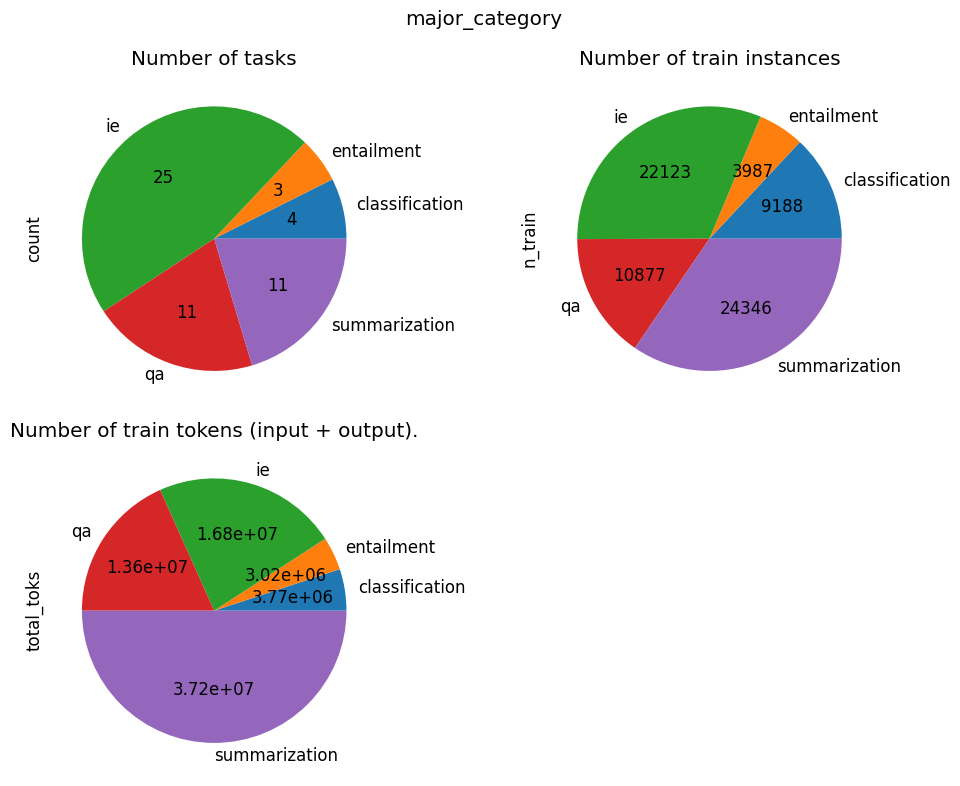

In [16]:
from matplotlib import pyplot as plt

df["major_category"] = [x.split(".")[0] for x in df["task"]]
make_pie_charts(df, "major_category")


## Domain statistics

Note that some tasks can be associated with multiple domains, so there's some double-counting here. It's fairly heavy on biomed, but there's a good amount of AI instances as well.

Based on this, maybe we should combine chemistry and materials science?

Token counts:
domain
artificial_intelligence    32232414
biomedicine                40620301
chemistry                   8178058
clinical_medicine          19879782
materials_science           3830924
misc                       10247547
Name: total_toks, dtype: int64


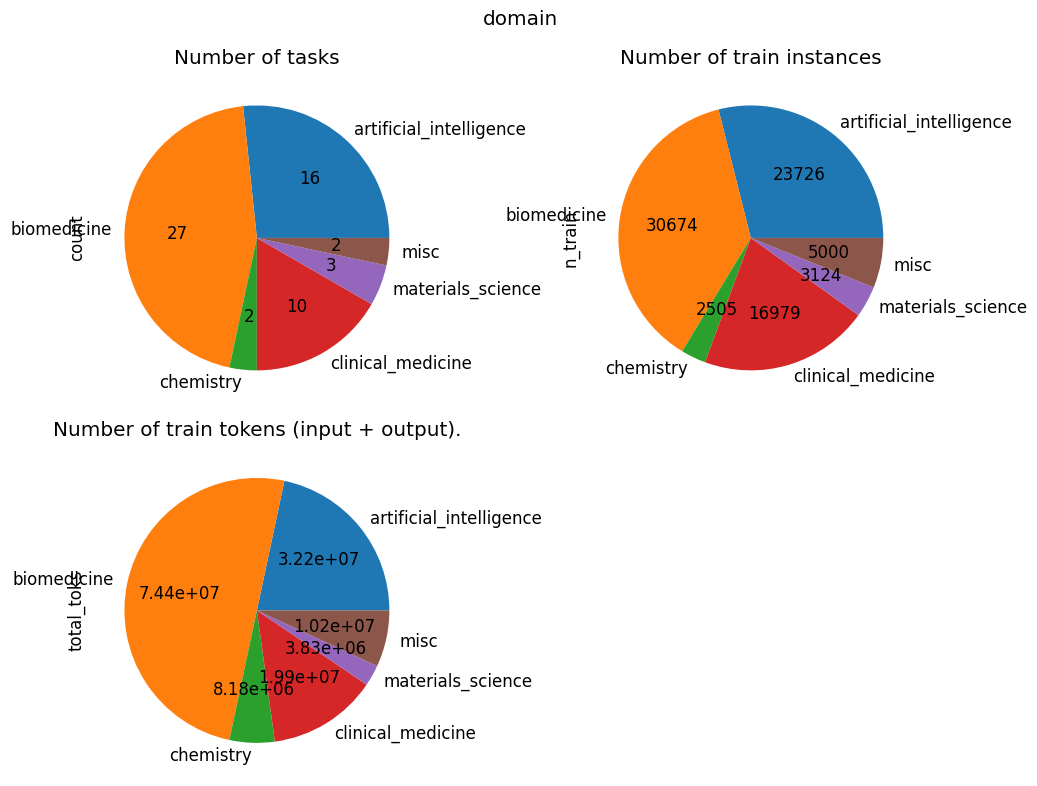

In [18]:
domain_df = []

for _, row in df.iterrows():
    domains = row["domains"].split(" | ")
    for domain in domains:
        domain_df.append({"domain": domain, "n_train": row["n_train"], "total_toks": row["total_toks"]})

domain_df = pd.DataFrame(domain_df)

make_pie_charts(domain_df, "domain")


In [19]:
# print mean token counts computed above
print(df[["mean_toks_input", "mean_toks_output"]].mean())

mean_toks_input     1227.945835
mean_toks_output     159.293099
dtype: float64


## Input and output context

The types of input and output expected by the model. Interestingly, the majority of the tasks require `json` output. This happens for both IE tasks, as well as tasks like QA and entailment that require some kind of rationale justifying their answer.

Token counts:
input_context
multiple_paragraphs    60567557
paragraph              35935255
sentence                 309562
structured               683154
Name: total_toks, dtype: int64


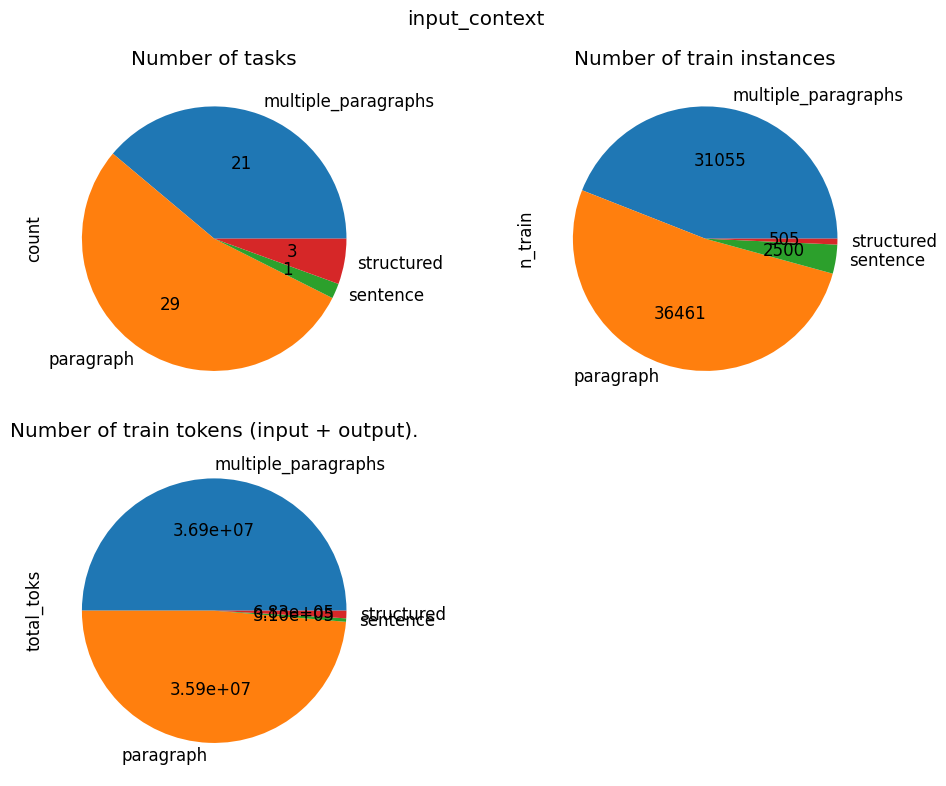

In [20]:
make_pie_charts(df, "input_context")


Token counts:
output_context
json         26503382
jsonlines      683154
label         3092983
paragraph    57701762
sentence      9514247
Name: total_toks, dtype: int64


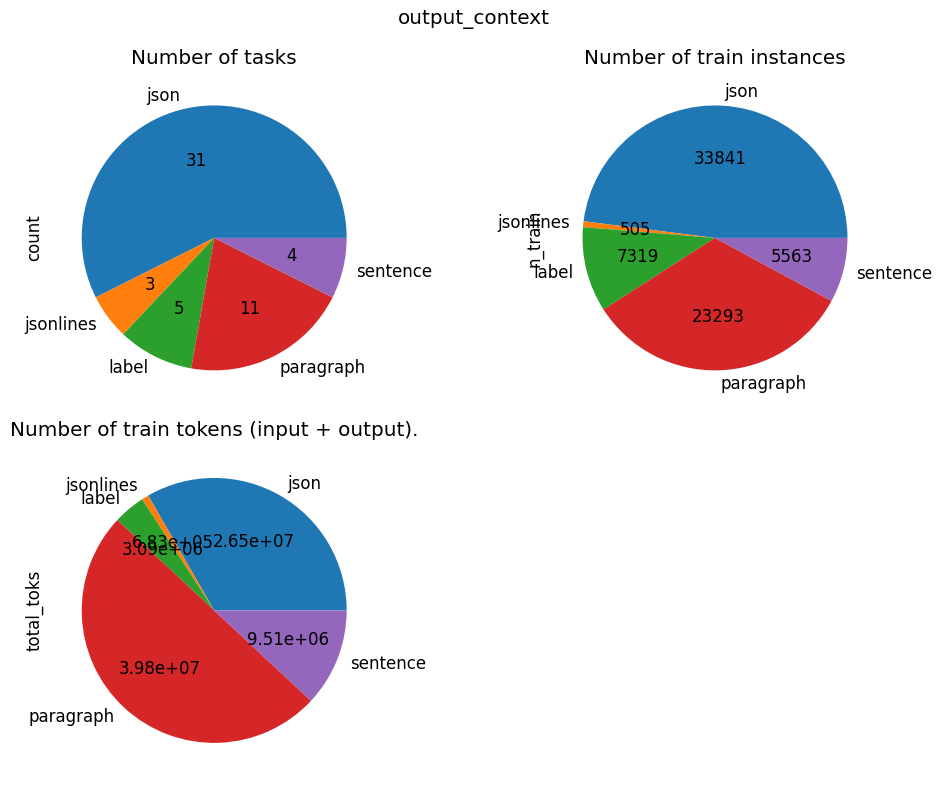

In [21]:
make_pie_charts(df, "output_context")


## Distribution of instances per task

Histograms showing the number of instances per task, across folds. The long tail at 10k is mostly summarization tasks for which we have essentially unlimited data.

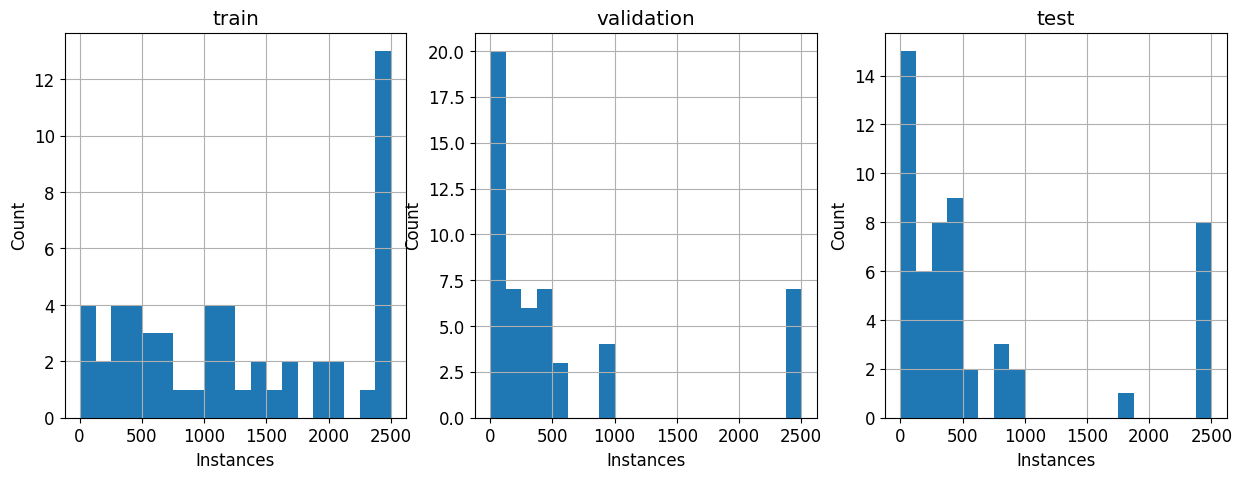

In [22]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for split, ax in zip(["train", "validation", "test"], axs):
    df[f"n_{split}"].hist(ax=ax, bins=20)
    ax.set_xlabel("Instances")
    ax.set_ylabel("Count")
    ax.set_title(split)


## Instance length distribution

Distribution of median input and output length, in tokens (using llama-2 tokenizer).

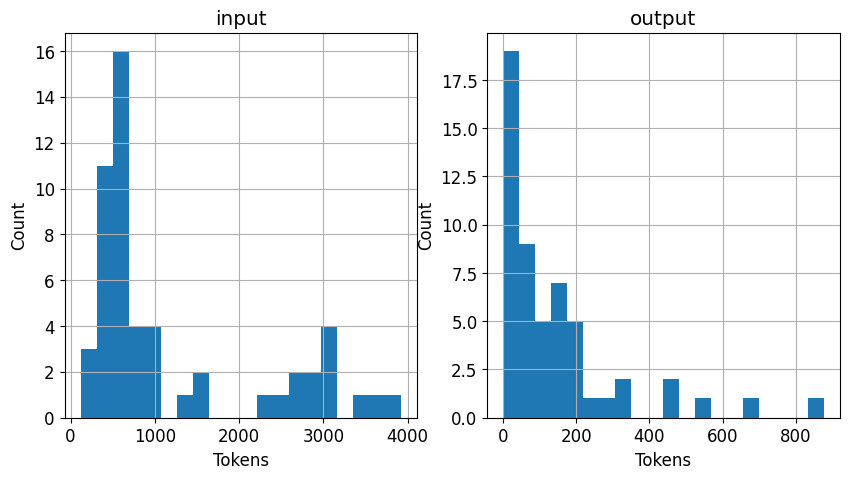

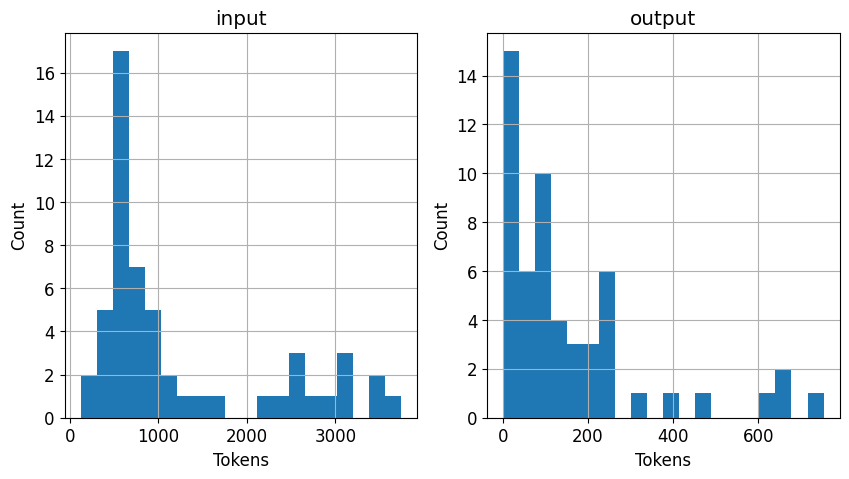

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

for name, ax in zip(["input", "output"], axs):
    # Clip very long tasks.
    upper = 8096 if name == "input" else 1000
    df[f"median_toks_{name}"].clip(upper=upper).hist(ax=ax, bins=20)
    ax.set_xlabel("Tokens")
    ax.set_ylabel("Count")
    ax.set_title(name)

# Mean token

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

for name, ax in zip(["input", "output"], axs):
    # Clip very long tasks.
    upper = 8096 if name == "input" else 1000
    df[f"mean_toks_{name}"].clip(upper=upper).hist(ax=ax, bins=20)
    ax.set_xlabel("Tokens")
    ax.set_ylabel("Count")
    ax.set_title(name)


## Full list of tasks

In [41]:
fields_to_show = [ "domains", "task", "source_type", "input_context", "output_context", "n_train"]
df[fields_to_show].sort_values(["domains", "task"])

,domains,task,source_type,input_context,output_context,n_train
name,,,,,,
acl_arc_intent_classification,artificial_intelligence,classification,single_source,multiple_paragraphs,label,1688
multicite_intent_classification,artificial_intelligence,classification,single_source,paragraph,json,2500
scicite_classification,artificial_intelligence,classification,single_source,paragraph,label,2500
scierc_ner,artificial_intelligence,ie.named_entity_recognition,single_source,paragraph,json,346
scierc_re,artificial_intelligence,ie.relation_extraction,single_source,paragraph,json,346
mltables_te,artificial_intelligence,ie.structure_to_json,single_source,structured,jsonlines,25
qasa_abstractive_qa,artificial_intelligence,qa.abstractive,single_source,multiple_paragraphs,paragraph,932
qasper_abstractive_qa,artificial_intelligence,qa.abstractive,single_source,multiple_paragraphs,json,206
qasper_extractive_qa,artificial_intelligence,qa.extractive,single_source,multiple_paragraphs,json,709


In [48]:
df

,task,domains,source_type,input_context,output_context,n_train,n_validation,n_test,total_toks_input,total_toks_output,total_toks,median_toks_input,median_toks_output,mean_toks_input,mean_toks_output
name,,,,,,,,,,,,,,,
acl_arc_intent_classification,classification,artificial_intelligence,single_source,multiple_paragraphs,label,1688,114,139,941162,3805,944967,541,1,557.560427,2.254147
anat_em_ner,ie.named_entity_recognition,biomedicine,single_source,paragraph,json,606,201,404,302329,31201,333530,491,44,498.892739,51.486799
annotated_materials_syntheses_events,ie.event_extraction,materials_science,single_source,paragraph,json,149,30,50,127989,56330,184319,805,310,858.986577,378.053691
bc7_litcovid_topic_classification,classification,clinical_medicine,single_source,paragraph,json,2500,2500,2500,1538021,16760,1554781,600,5,615.208400,6.704000
bioasq_factoid_qa,qa.abstractive,biomedicine,multiple_source,multiple_paragraphs,sentence,1316,98,98,920463,13361,933824,455,7,699.439970,10.152736
bioasq_general_qa,qa.abstractive,biomedicine,multiple_source,multiple_paragraphs,sentence,1054,76,76,775516,179625,955141,558,106,735.783681,170.422201
bioasq_list_qa,qa.abstractive,biomedicine,multiple_source,multiple_paragraphs,json,832,64,64,774003,31939,805942,744,28,930.292067,38.388221
bioasq_yesno_qa,qa.yes_no,biomedicine,multiple_source,multiple_paragraphs,label,1181,86,86,873954,1181,875135,516,1,740.011854,1.000000
biored_ner,ie.named_entity_recognition,biomedicine,single_source,paragraph,json,400,100,100,270844,56723,327567,678,134,677.110000,141.807500


In [59]:
# For each task type (the key is "task"), get the mean token counts for input and output

df.groupby("task")[["mean_toks_input", "mean_toks_output"]].mean()

,mean_toks_input,mean_toks_output
task,,
classification,418.967707,3.630137
entailment,677.960554,85.244182
ie.event_extraction,858.986577,378.053691
ie.named_entity_recognition,796.551933,115.654285
ie.relation_extraction,809.027869,135.370031
ie.structure_to_json,1462.461053,691.964211
qa.abstractive,1235.486249,100.580910
qa.extractive,3569.324277,122.027166
qa.multiple_choice,501.151084,7.279303


In [57]:
df2.head()

,mean_toks_input,mean_toks_output
name,,
acl_arc_intent_classification,557.560427,2.254147
anat_em_ner,498.892739,51.486799
annotated_materials_syntheses_events,858.986577,378.053691
bc7_litcovid_topic_classification,615.208400,6.704000
bioasq_factoid_qa,699.439970,10.152736
bioasq_general_qa,735.783681,170.422201
bioasq_list_qa,930.292067,38.388221
bioasq_yesno_qa,740.011854,1.000000
biored_ner,677.110000,141.807500
